In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("telco-customer-churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
for column in df.columns:
    print(f'{column}:{df[column].unique()}')

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [6]:
binary_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                  'TechSupport', 'StreamingTV', 'StreamingMovies', 
                  'PaperlessBilling', 'Churn']

service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']


df[service_columns] = df[service_columns].replace({'No phone service': 'No', 'No internet service': 'No'})


df[binary_columns] = df[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))


df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [7]:

categorical_columns = ['gender', 'InternetService', 'Contract', 'PaymentMethod']


df2 = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df2.head()


,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,0,0,1,0,...,29.85,0,False,False,False,False,False,False,True,False
1,5575-GNVDE,0,0,0,34,1,0,1,0,1,...,1889.5,0,True,False,False,True,False,False,False,True
2,3668-QPYBK,0,0,0,2,1,0,1,1,0,...,108.15,1,True,False,False,False,False,False,False,True
3,7795-CFOCW,0,0,0,45,0,0,1,0,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


In [8]:
df2.set_index('customerID', inplace=True)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df2.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


ValueError: could not convert string to float: ' '

In [10]:
for column in df2.columns:
    print(f'{column}:{type(df2[column][0])}')

SeniorCitizen:<class 'numpy.int64'>
Partner:<class 'numpy.int64'>
Dependents:<class 'numpy.int64'>
tenure:<class 'numpy.int64'>
PhoneService:<class 'numpy.int64'>
MultipleLines:<class 'numpy.int64'>
OnlineSecurity:<class 'numpy.int64'>
OnlineBackup:<class 'numpy.int64'>
DeviceProtection:<class 'numpy.int64'>
TechSupport:<class 'numpy.int64'>
StreamingTV:<class 'numpy.int64'>
StreamingMovies:<class 'numpy.int64'>
PaperlessBilling:<class 'numpy.int64'>
MonthlyCharges:<class 'numpy.float64'>
TotalCharges:<class 'str'>
Churn:<class 'numpy.int64'>
gender_Male:<class 'numpy.bool_'>
InternetService_Fiber optic:<class 'numpy.bool_'>
InternetService_No:<class 'numpy.bool_'>
Contract_One year:<class 'numpy.bool_'>
Contract_Two year:<class 'numpy.bool_'>
PaymentMethod_Credit card (automatic):<class 'numpy.bool_'>
PaymentMethod_Electronic check:<class 'numpy.bool_'>
PaymentMethod_Mailed check:<class 'numpy.bool_'>


/var/folders/v0/40nc5nks2gz7r8x5rfsgjqsr0000gn/T/ipykernel_44578/853545637.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{column}:{type(df2[column][0])}')


Observation: Total charges is supposed to be a float value, but, it is a string

In [11]:
df2['TotalCharges'] = pd.to_numeric(df2['TotalCharges'], errors='coerce')

In [12]:
for column in df2.columns:
    print(f'{column}:{type(df2[column][0])}')

SeniorCitizen:<class 'numpy.int64'>
Partner:<class 'numpy.int64'>
Dependents:<class 'numpy.int64'>
tenure:<class 'numpy.int64'>
PhoneService:<class 'numpy.int64'>
MultipleLines:<class 'numpy.int64'>
OnlineSecurity:<class 'numpy.int64'>
OnlineBackup:<class 'numpy.int64'>
DeviceProtection:<class 'numpy.int64'>
TechSupport:<class 'numpy.int64'>
StreamingTV:<class 'numpy.int64'>
StreamingMovies:<class 'numpy.int64'>
PaperlessBilling:<class 'numpy.int64'>
MonthlyCharges:<class 'numpy.float64'>
TotalCharges:<class 'numpy.float64'>
Churn:<class 'numpy.int64'>
gender_Male:<class 'numpy.bool_'>
InternetService_Fiber optic:<class 'numpy.bool_'>
InternetService_No:<class 'numpy.bool_'>
Contract_One year:<class 'numpy.bool_'>
Contract_Two year:<class 'numpy.bool_'>
PaymentMethod_Credit card (automatic):<class 'numpy.bool_'>
PaymentMethod_Electronic check:<class 'numpy.bool_'>
PaymentMethod_Mailed check:<class 'numpy.bool_'>


/var/folders/v0/40nc5nks2gz7r8x5rfsgjqsr0000gn/T/ipykernel_44578/853545637.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'{column}:{type(df2[column][0])}')


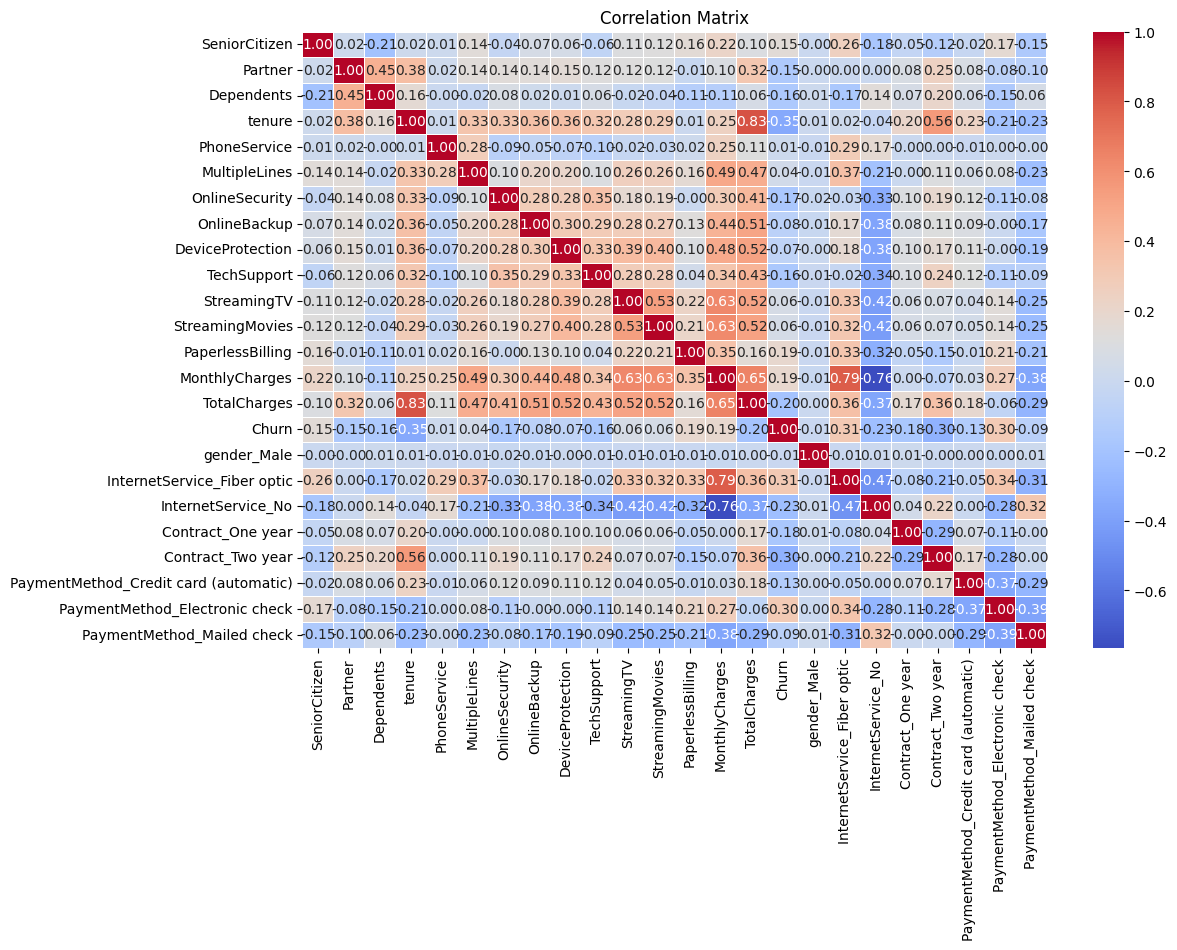

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df2.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [14]:
df3 = df2.drop('TotalCharges', axis=1)

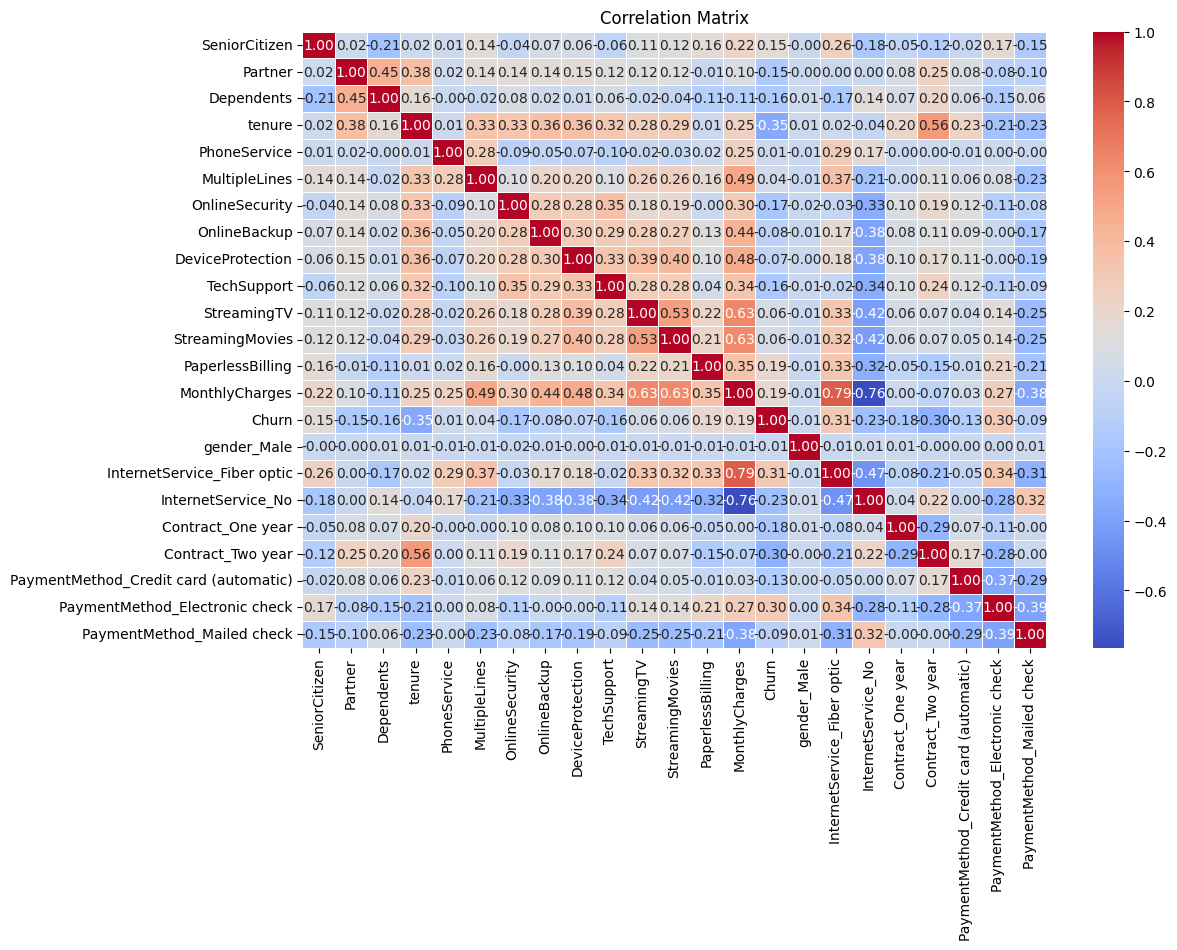

In [15]:
correlation_matrix = df3.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


X = df3.drop('Churn', axis=1)
y = df3['Churn']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print(feature_importance_df)



                                  Feature  Importance
3                                  tenure    0.242319
13                         MonthlyCharges    0.239132
15            InternetService_Fiber optic    0.047269
18                      Contract_Two year    0.042333
20         PaymentMethod_Electronic check    0.040731
14                            gender_Male    0.034354
12                       PaperlessBilling    0.029473
17                      Contract_One year    0.028205
1                                 Partner    0.027906
6                          OnlineSecurity    0.027342
7                            OnlineBackup    0.025129
9                             TechSupport    0.025031
0                           SeniorCitizen    0.024621
2                              Dependents    0.023116
8                        DeviceProtection    0.023002
5                           MultipleLines    0.022882
11                        StreamingMovies    0.021258
10                          

In [17]:

features_to_drop = ['PhoneService', 'StreamingTV', 'StreamingMovies', 'InternetService_Fiber optic','InternetService_No']
df3 = df3.drop(features_to_drop, axis=1)

df3.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,PaperlessBilling,MonthlyCharges,Churn,gender_Male,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,0,1,0,0,1,0,0,1,29.85,0,False,False,False,False,True,False
5575-GNVDE,0,0,0,34,0,1,0,1,0,0,56.95,0,True,True,False,False,False,True
3668-QPYBK,0,0,0,2,0,1,1,0,0,1,53.85,1,True,False,False,False,False,True
7795-CFOCW,0,0,0,45,0,1,0,1,1,0,42.30,0,True,True,False,False,False,False
9237-HQITU,0,0,0,2,0,0,0,0,0,1,70.70,1,False,False,False,False,True,False


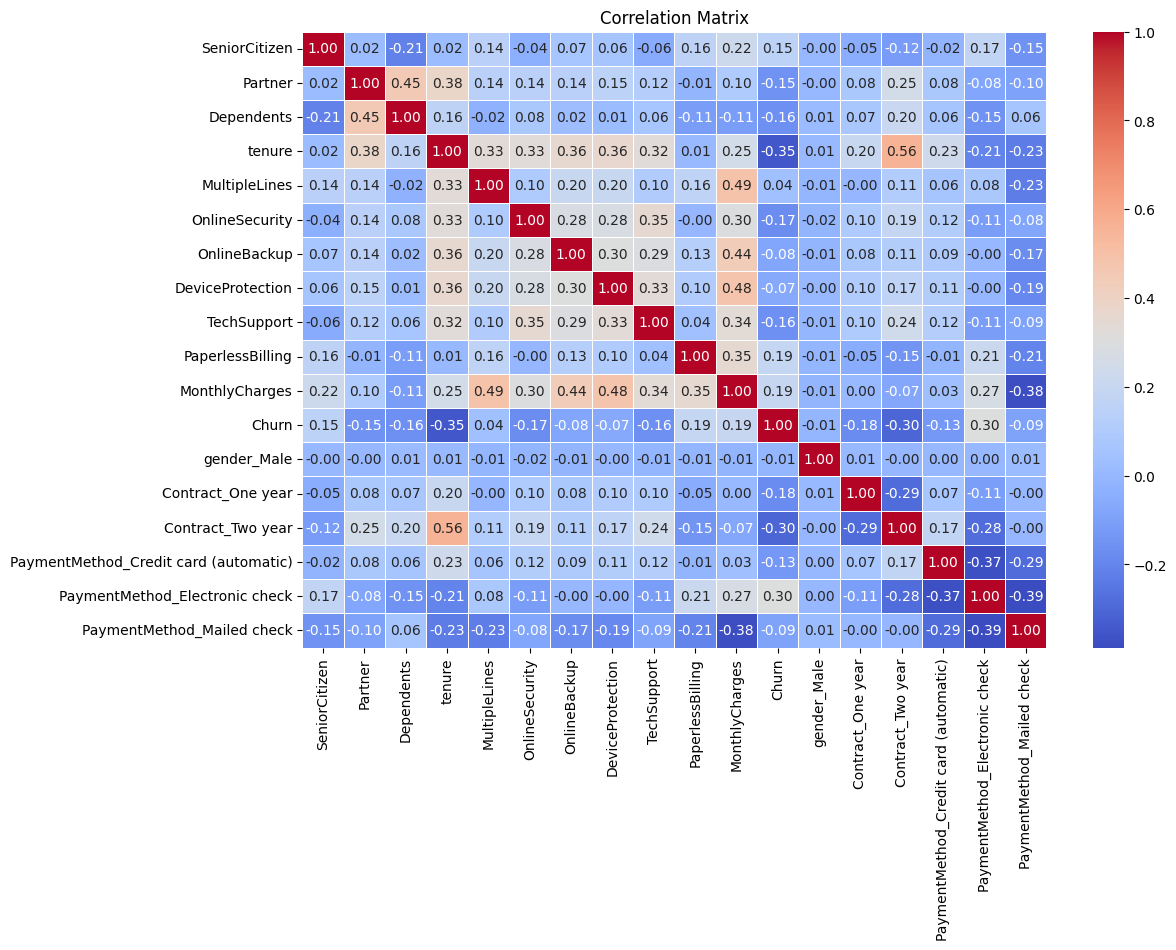

In [18]:
correlation_matrix = df3.corr()


plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sweetviz as sv

train_df, test_df = train_test_split(df3, test_size=0.2, random_state=42)

report = sv.compare([train_df, "Training"], [test_df, "Test"], "Churn")


report.show_html("dataset_comparison.html")

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left) 


Report dataset_comparison.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
